Generation 1, Best Fitness: 3364.6688224088607
Generation 2, Best Fitness: 3393.075741767957
Generation 3, Best Fitness: 3322.6841320672243
Generation 4, Best Fitness: 3355.014503996588
Generation 5, Best Fitness: 3368.338081383655
Generation 6, Best Fitness: 3302.8335085816775
Generation 7, Best Fitness: 3346.652069411889
Generation 8, Best Fitness: 3322.6626758428
Generation 9, Best Fitness: 3363.6749424699306
Generation 10, Best Fitness: 3274.4910313734013
Generation 11, Best Fitness: 3274.4910313734013
Generation 12, Best Fitness: 3235.800186307016
Generation 13, Best Fitness: 3222.6116146604463
Generation 14, Best Fitness: 3206.52630189478
Generation 15, Best Fitness: 3160.406192546822
Generation 16, Best Fitness: 3138.471618244449
Generation 17, Best Fitness: 3118.91243029664
Generation 18, Best Fitness: 3102.6173545679294
Generation 19, Best Fitness: 3089.355537196239
Generation 20, Best Fitness: 3044.401204622144
Generation 21, Best Fitness: 3041.711756113613
Generation 22, Bes

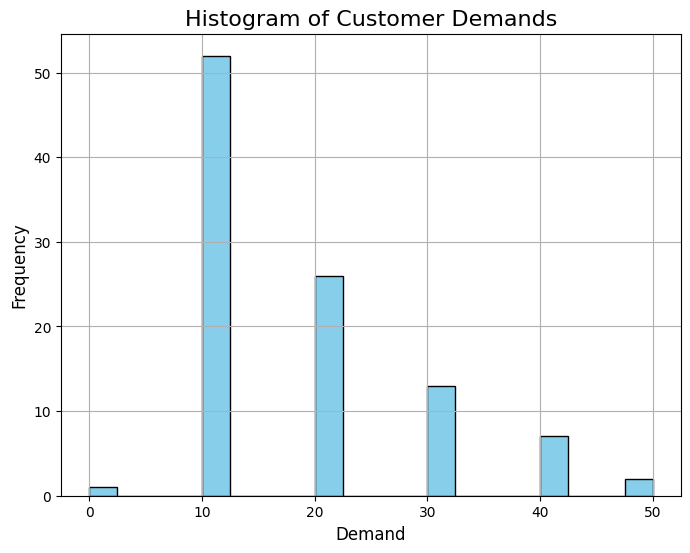

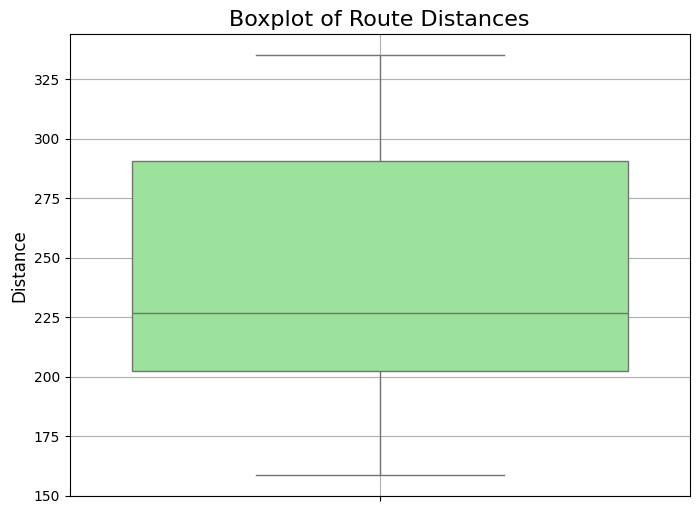

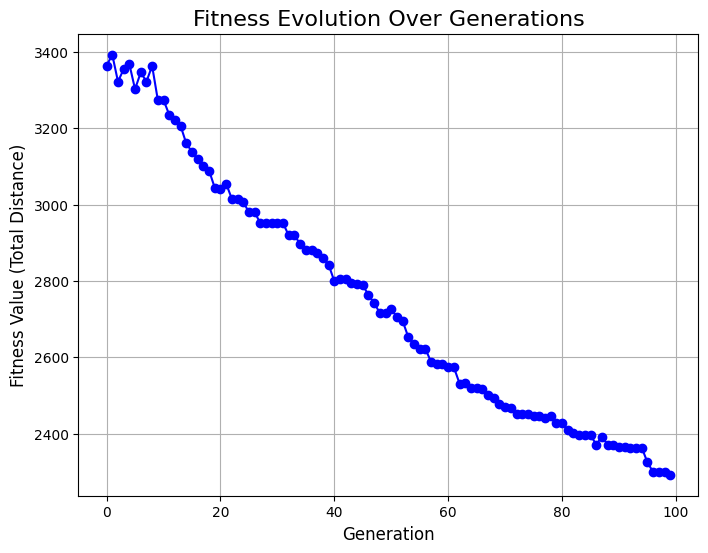

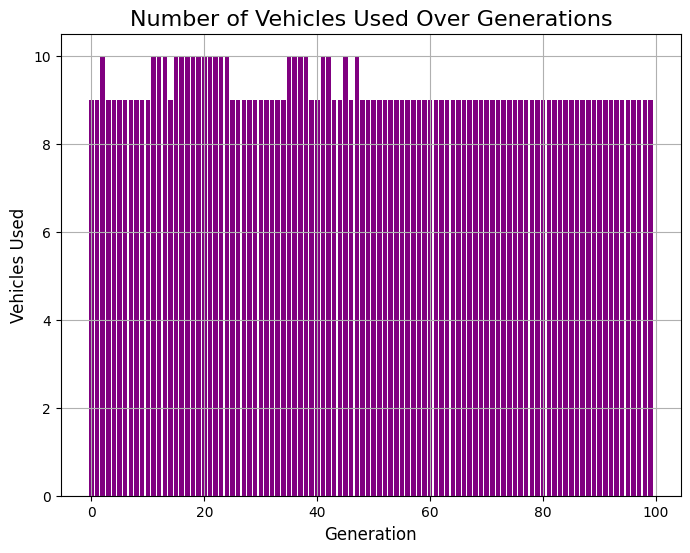

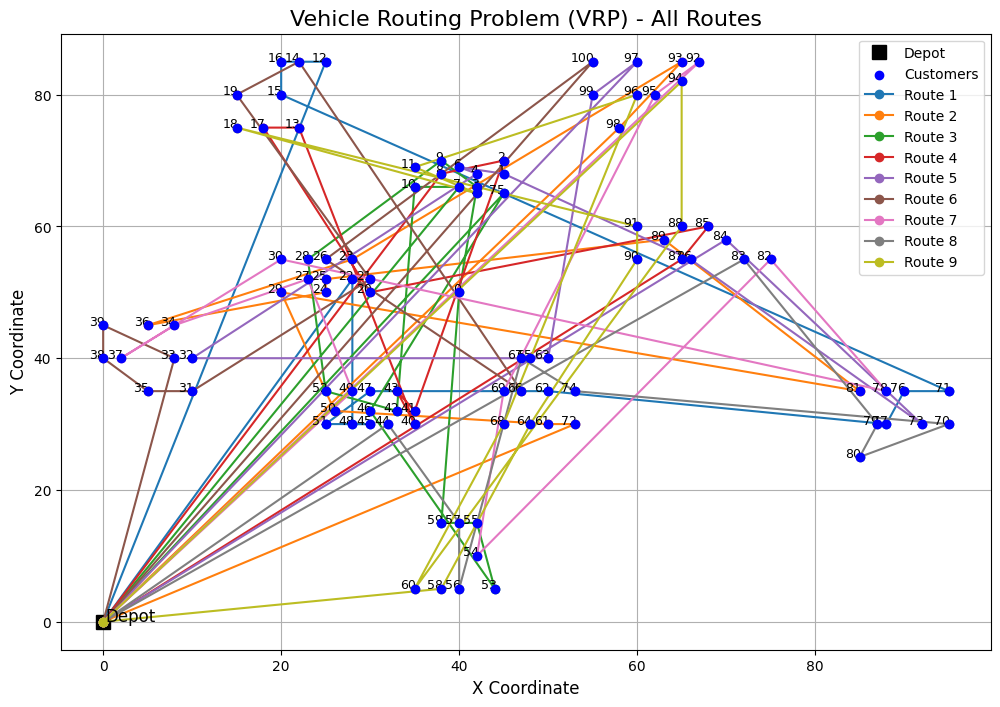

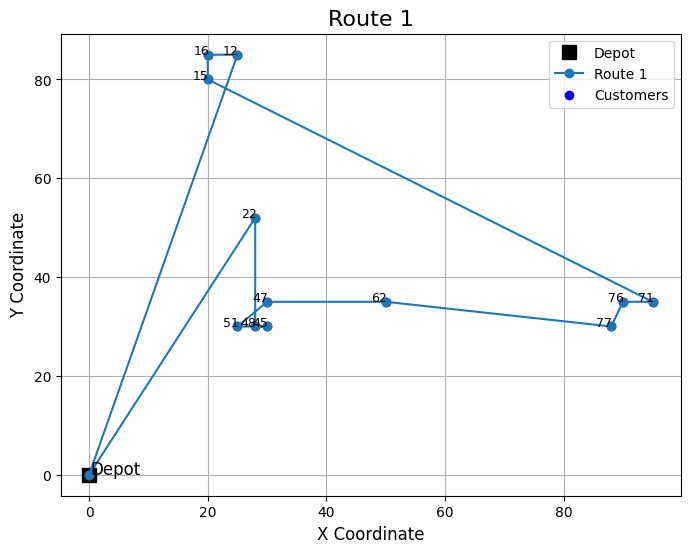

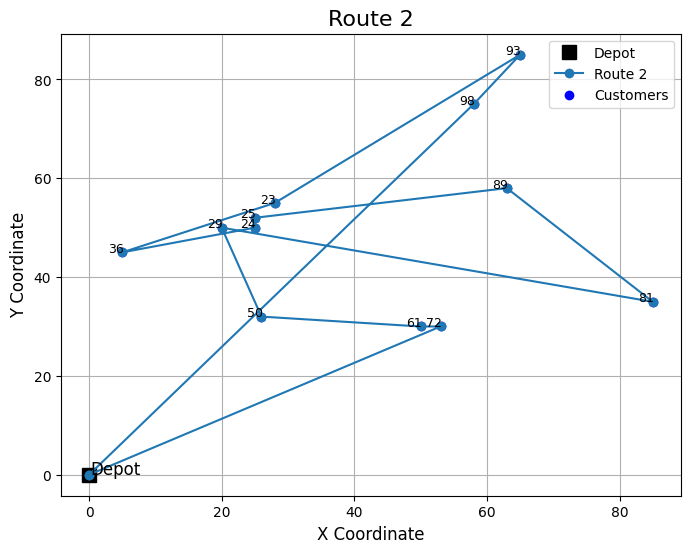

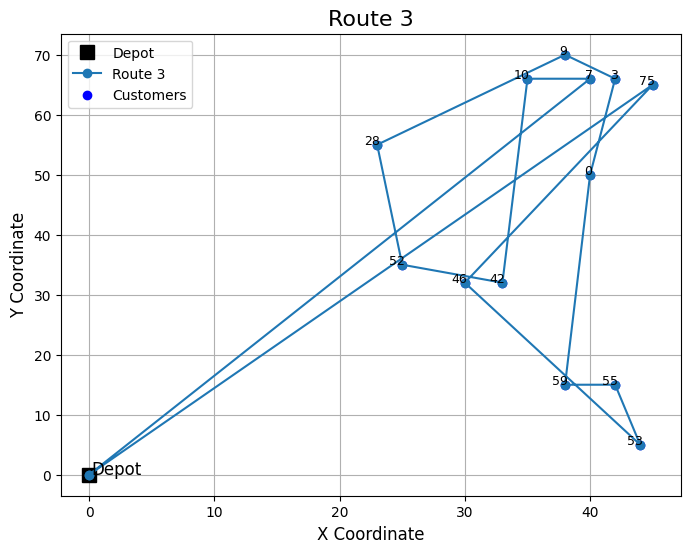

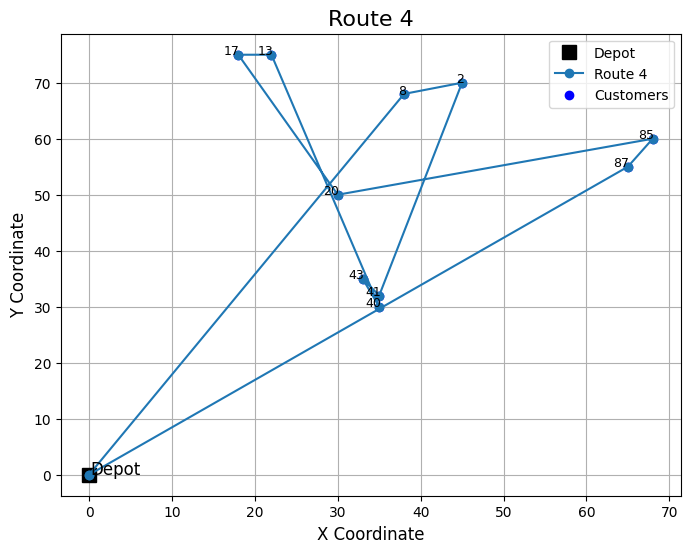

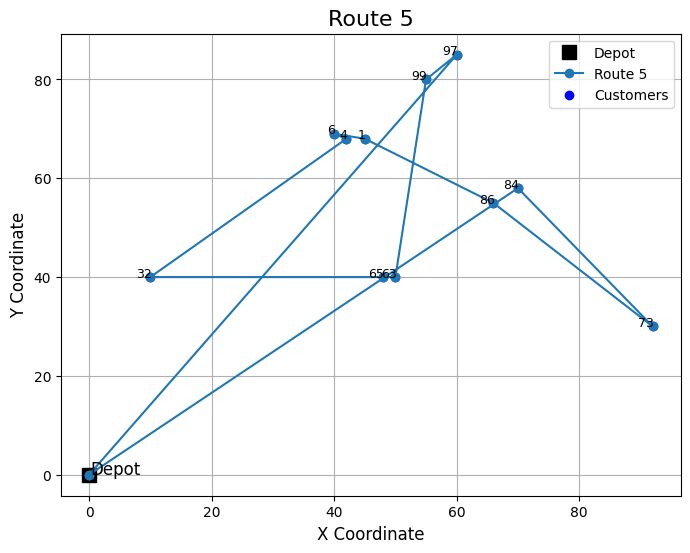

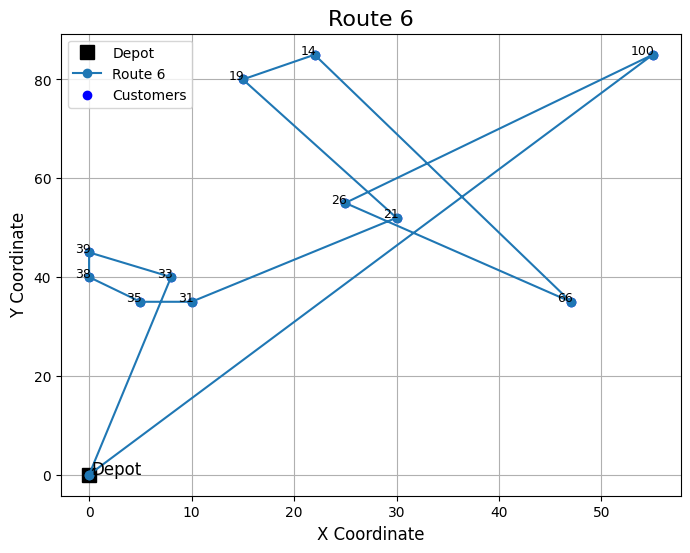

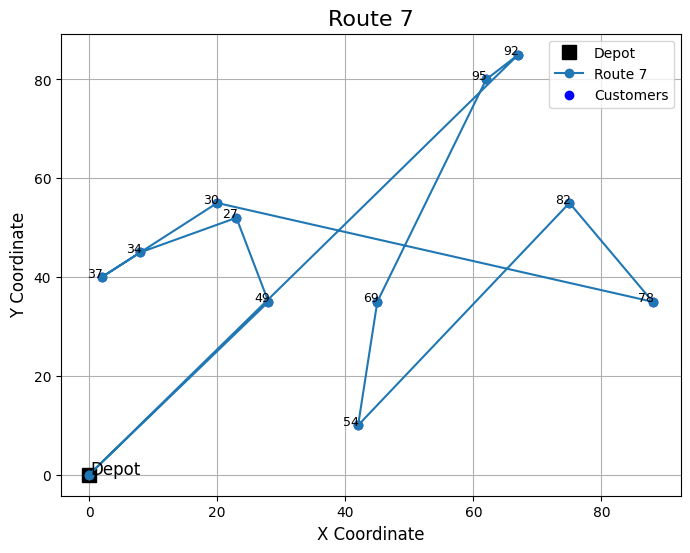

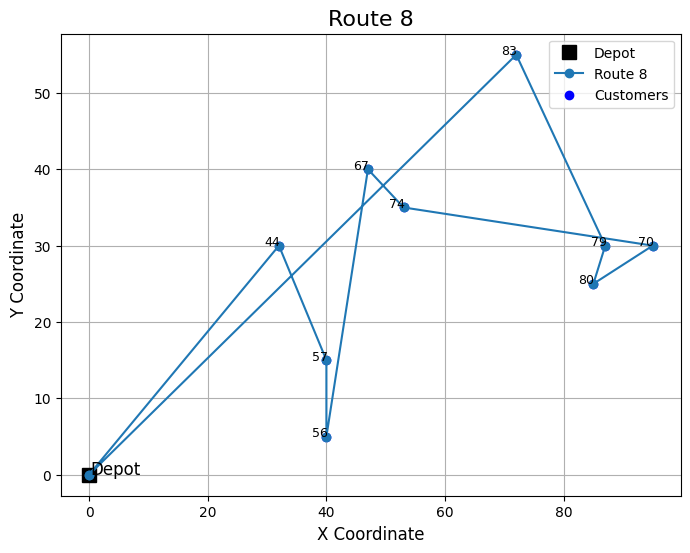

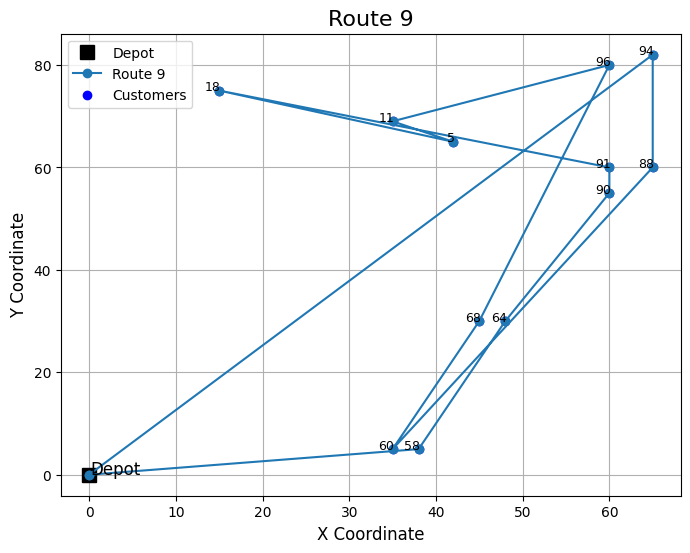

In [3]:
import seaborn as sns

# Function to plot histogram of customer demands
def plot_customer_demands(customers):
    demands = [cust['demand'] for cust in customers]
    plt.figure(figsize=(8, 6))
    plt.hist(demands, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Customer Demands', fontsize=16)
    plt.xlabel('Demand', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

# Function to plot boxplot of route distances
def plot_route_distances(routes, dist_matrix, customers):
    route_distances = []
    for route in routes:
        route_distance = 0
        for i in range(len(route) - 1):
            route_distance += dist_matrix[route[i]][route[i + 1]]
        route_distances.append(route_distance)

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=route_distances, color='lightgreen')
    plt.title('Boxplot of Route Distances', fontsize=16)
    plt.ylabel('Distance', fontsize=12)
    plt.grid(True)
    plt.show()

# Function to plot fitness evolution over generations
def plot_fitness_evolution(fitness_values):
    plt.figure(figsize=(8, 6))
    plt.plot(fitness_values, color='b', marker='o')
    plt.title('Fitness Evolution Over Generations', fontsize=16)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Fitness Value (Total Distance)', fontsize=12)
    plt.grid(True)
    plt.show()

# Function to plot bar plot of the number of vehicles used in each generation
def plot_vehicles_used(evolved_vehicles_count):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(evolved_vehicles_count)), evolved_vehicles_count, color='purple')
    plt.title('Number of Vehicles Used Over Generations', fontsize=16)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Vehicles Used', fontsize=12)
    plt.grid(True)
    plt.show()

# Add code to track fitness and vehicles used during the genetic algorithm
def solve_vrptw_with_statistics(file_path):
    vehicle_capacity, customers = parse_input(file_path)
    num_customers = len(customers)

    dist_matrix = np.zeros((num_customers, num_customers))
    for i in range(num_customers):
        for j in range(num_customers):
            dist_matrix[i][j] = calculate_travel_time(customers[i], customers[j])

    population_size = 50
    generations = 100
    mutation_rate = 0.1
    population = generate_initial_population(population_size, num_customers)
    
    fitness_history = []  # Track fitness over generations
    evolved_vehicles_count = []  # Track vehicles used over generations

    for gen in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, dist_matrix, vehicle_capacity, customers)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        population = new_population

        # Track the fitness and vehicles used in the generation
        best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
        fitness_history.append(fitness(best_individual, dist_matrix, vehicle_capacity, customers))
        routes = extract_routes(best_individual, customers, vehicle_capacity)
        num_vehicles = len(routes)
        evolved_vehicles_count.append(num_vehicles)

        print(f"Generation {gen + 1}, Best Fitness: {fitness_history[-1]}")

    # Final best individual and routes
    best_individual = min(population, key=lambda x: fitness(x, dist_matrix, vehicle_capacity, customers))
    routes = extract_routes(best_individual, customers, vehicle_capacity)
    print("\nOptimized Routes:")
    for i, route in enumerate(routes):
        print(f"Vehicle {i + 1}: {route}")

    # Descriptive Statistical Plots
    plot_customer_demands(customers)  # Histogram of customer demands
    plot_route_distances(routes, dist_matrix, customers)  # Boxplot of route distances
    plot_fitness_evolution(fitness_history)  # Fitness evolution over generations
    plot_vehicles_used(evolved_vehicles_count)  # Number of vehicles used per generation

    plot_routes(customers, routes, depot=(0, 0))
    plot_individual_routes(customers, routes, depot=(0, 0))


# Main entry point for file selection and solving with statistics
if __name__ == "__main__":
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select VRPTW Input File")
    if file_path:
        solve_vrptw_with_statistics(file_path)
